In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier 
#from sklearn.linear_model import SDGClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#%matplotlib.inline



data=pd.read_csv('winequality-red.csv')
print(data.head())

C:\Users\HP\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\HP\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  

FileNotFoundError: [Errno 2] No such file or directory: 'winequality-red.csv'

In [9]:
 data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
data.quality

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [10]:
#preprocessing
#cut is to categorize your data
bins=(2,6.5,8)
group_names=['bad','good']
data.quality=pd.cut(data.quality,bins=bins,labels=group_names)
data['quality'].unique()

[bad, good]
Categories (2, object): [bad < good]

In [8]:
data['quality'].head()

0    bad
1    bad
2    bad
3    bad
4    bad
Name: quality, dtype: category
Categories (2, object): [bad < good]

In [9]:
data['quality'].unique()

[bad, good]
Categories (2, object): [bad < good]

In [11]:
Label_quality=LabelEncoder()

In [13]:
data['quality']=Label_quality.fit_transform(data['quality'])

In [14]:
print(data['quality'].head())

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64


In [13]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [14]:
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

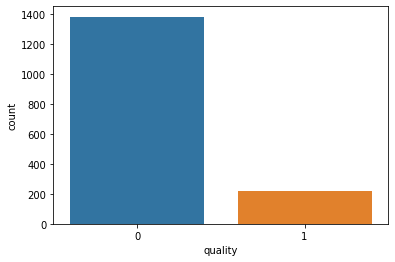

In [15]:
sns.countplot(data.quality)

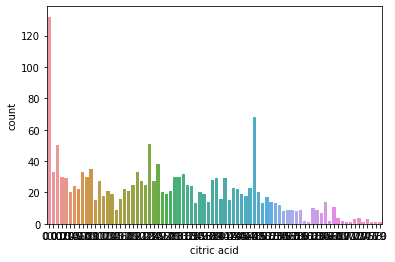

In [16]:
sns.countplot(data['citric acid'])

In [17]:
data['pH']


0       3.51
1       3.20
2       3.26
3       3.16
4       3.51
        ... 
1594    3.45
1595    3.52
1596    3.42
1597    3.57
1598    3.39
Name: pH, Length: 1599, dtype: float64

In [18]:

bins=(2,3.5,4)
grading=['Low','High']
data['pH']=pd.cut(data['pH'],bins=bins,labels=grading)


In [19]:
data['pH']

0       High
1        Low
2        Low
3        Low
4       High
        ... 
1594     Low
1595    High
1596     Low
1597    High
1598     Low
Name: pH, Length: 1599, dtype: category
Categories (2, object): [Low < High]

In [6]:
data['pH'].unique()

NameError: name 'data' is not defined

In [21]:
label_pH=LabelEncoder()

In [23]:
data['pH'].isnull().sum
data.dropna(inplace=True)

In [24]:
data.pH=label_pH.fit_transform(data.pH)

In [25]:
data.pH

0       0
1       1
2       1
3       1
4       0
       ..
1594    1
1595    0
1596    1
1597    0
1598    1
Name: pH, Length: 1597, dtype: int32

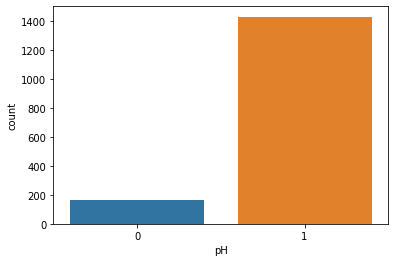

In [26]:
sns.countplot(data.pH)

In [2]:
#training and splitting of the data set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)



NameError: name 'train_test_split' is not defined

In [30]:
#appling standard scaling to the data set leveling the plain to reduce bias of the data
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [31]:
X_train

array([[ 0.22792049,  0.93269188,  0.20331468, ...,  0.34382213,
         0.45904155,  1.099786  ],
       [-1.29042143, -1.8093538 ,  0.66465638, ...,  0.34382213,
        -0.4054694 ,  1.38183715],
       [ 1.51267135, -0.78108667,  1.02347769, ...,  0.34382213,
         0.51667561, -0.59252093],
       ...,
       [-0.648046  ,  0.53281022, -1.07819002, ..., -2.90848058,
        -0.69363971, -0.87457209],
       [-1.23202366,  1.47538842, -1.38575114, ..., -2.90848058,
        -0.29020127, -0.40448683],
       [-1.46561473, -1.35234619, -0.05298626, ...,  0.34382213,
        -0.69363971,  2.88610997]])

In [32]:
#THE RANDOM FOREST CLASSIFIER
rfc=RandomForestClassifier(n_estimators=200)

In [33]:
rfc.fit(X_train,y_train)
predict_rfc=rfc.predict(X_test)

In [34]:
predict_rfc[:20]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0])

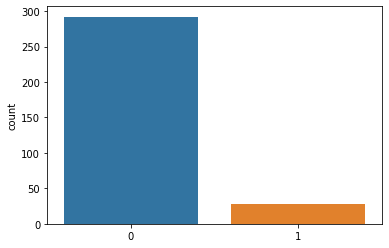

In [35]:
sns.countplot(predict_rfc)

In [36]:
#see how our model work
print(classification_report(y_test,predict_rfc))
print(confusion_matrix(y_test,predict_rfc))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       270
           1       0.93      0.52      0.67        50

    accuracy                           0.92       320
   macro avg       0.92      0.76      0.81       320
weighted avg       0.92      0.92      0.91       320

[[268   2]
 [ 24  26]]


In [37]:
#SVM CLASSIFIER

clf=SVC()


In [38]:
clf.fit(X_train,y_train)
prediction=clf.predict(X_test)

In [39]:
accuracy=classification_report(X_test,prediction)

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

In [ ]:
svm_accuracy=confusion_matrix(y_test,prediction)

In [ ]:
print(accuracy)

In [ ]:
print(svm_accuracy)

In [ ]:
prediction_2=clf.predict(X_test)
clf=LinearRegression()
clf.fit(X_train,y_train)
prediction_2=clf.predict(X_test)
classification_report(y_test,prediction_2)

In [ ]:
prediction_2

In [ ]:
accuracy=confusion_matrix(prediction_2,y_test)

In [ ]:
classification_report(y_test,prediction_2)

mlpc=MLPClassifier()
mlpc.fit(X_train,y_train)
predict_mlpc=mlpc.predict(X_test)

In [ ]:
mlpc=MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
mlpc.fit(X_train,y_train)
predict_mlpc=mlpc.predict(X_test)

In [ ]:
predict_mlpc


In [4]:
print(classification_report(y_test,predict_mlpc))
print(confusion_matrix(y_test,predict_mlpc))

NameError: name 'classification_report' is not defined

In [ ]:
from sklearn.metrics import accuracy_score
cm=accuracy_score(y_test,predict_mlpc)
print('model accuracy is::')
print(cm*100,'%')

In [ ]:
data.head(10)

In [ ]:
Xnew=[[7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,1,0.57,9.5]]

Xnew=sc.transform(Xnew)
ynew=rfc.predict(Xnew)
if(ynew==1):
    print('this is a grade 1 wine')
else:
    print('this is not a grade one wine')
#its now clear that our data has been re-categorised


In [ ]:
sns.countplot(ynew)

In [ ]:
data['pH'].dropna(inplace=True)

corr=data.corr(method='pearson',min_periods=1)

In [ ]:
print(corr)

In [ ]:
sns.heatmap(corr,cbar=True,square=True,cmap='coolwarm')

In [ ]:
print(data)

In [ ]:
data.head(10)

In [ ]:
bins=(2,5.5,11)
groups=['bad','good']
data['free sulfur dioxide']
data['free sulfurdioxide']=pd.cut(data['free sulfur dioxide'],bins=bins,labels=groups)
print(data['free sulfur dioxide'].unique())

In [40]:
#encoding the data
from sklearn.preprocessing import LabelEncoder,StandardScaler
data['free sulfur dioxide']=LabelEncoder().fit_transform(data['free sulfur dioxide'])
print(data['free sulfur dioxide'])

0       11
1       25
2       15
3       17
4       11
        ..
1594    32
1595    40
1596    29
1597    32
1598    18
Name: free sulfur dioxide, Length: 1597, dtype: int64


In [ ]:
print(data.head())